<a href="https://colab.research.google.com/github/mcash8/DVBS2X-DNN-Implementation/blob/main/Feed%20Forward%20NN/FFNNEQ_testDVB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import scipy.io as spio
import math
import time
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanSquaredError


start_time = time.time()

#parameters
num_classes = 2
batch_size = 64
epochs = 100

%cd /content/drive/My Drive/NN\ Input/debug
matname = 'deepSNR10_dvb_wnd7.mat'
mat = spio.loadmat(matname, squeeze_me=True)
x_train = mat['x']
x_valid = mat['x_val']
x_test = mat['x_test']
y_train = mat['y']
y_valid = mat['y_val']

#cast to float32
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32') 

print(x_train.shape, 'train samples')
print(x_valid.shape, 'valid samples')

print(y_train.shape, 'train labels')
print(y_valid.shape, 'valid labels')

print('Label Examples:\n', y_train[0:9])
print('Input Examples:\n', x_train[0])

# Define the network
model = Sequential()
model.add(Dense(36, activation='elu', input_dim=18))
model.add(Dense(20, activation='elu'))
model.add(Dense(6, activation = 'elu'))
model.add(Dense(num_classes, activation='tanh'))

model.summary()

model.compile(loss=keras.metrics.mean_squared_error,
            optimizer=SGD(),
            metrics=[keras.metrics.RootMeanSquaredError(name='rmse')])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_valid, y_valid))

elapsedTime = (time.time() - start_time)/60
print("--- %.2f minutes ---" % elapsedTime)

score = model.evaluate(x_train, y_train, verbose=2)
print('Final Training MSE:', score[0])
print('Final Training RMSE:', score[1])

score = model.evaluate(x_valid, y_valid, verbose=2)
print('Final Validation MSE:', score[0])
print('Final Validation RMSE:', score[1])

#save model
savename = 'deepSNR10_dvb_wnd7.h5'
model.save(savename)
!cp $savename /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models


#save history for graphing 
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 
# save to csv: 
hist_csv_file = 'history_deepSNR10_dvb_wnd7.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

!cp $hist_csv_file /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models

#make predictions 

predictions = model.predict(x_test)
matname = 'predictions_deepSNR10_dvb_wnd7.mat'
spio.savemat(matname, {'pred': predictions})

!cp $matname /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models

/content/drive/MyDrive/NN Output
/content/drive/MyDrive/NN Output/FFNNEq/Saved Models
cp: 'loss_dvb_wnd7.png' and '/content/drive/MyDrive/NN Output/FFNNEq/Saved Models/loss_dvb_wnd7.png' are the same file


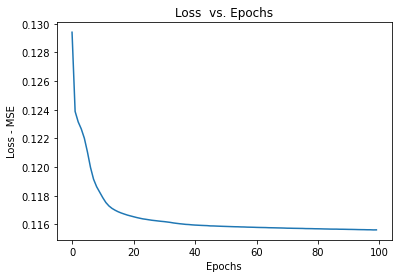

In [4]:
from pandas import read_csv
import matplotlib.pyplot as plt
%cd /content/drive/MyDrive/NN\ Output
name = 'deepSNR10_dvb_wnd7.mat'
%cd /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models
hist_csv_file = 'history_deepSNR10_dvb_wnd7.csv'
data = read_csv(hist_csv_file)

loss_data = data['loss']
plt.plot(loss_data)
plt.xlabel('Epochs') 
plt.ylabel('Loss - MSE') 
plt.title("Loss  vs. Epochs")

#save plt
plot_name = 'loss_dvb_wnd7.png'
plt.savefig(plot_name)
!cp $plot_name /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models